[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/NLP/blob/main/Representation-Learning/Word-RL/Word2Vec.ipynb)

# **Word2Vec Using Gensim Library**


## Preparing the data that we want to train on

In [ ]:
# In this we will use Mahabharata as our text corpus to train the model

# Following are the step to be done on the raw data before training
# 1. Cleaning the dataset using string manipulation and regular expression like solving text encoding issues
# 2. Creating a vocabulary of words using tokenization or regular expressions
# 3. Creating a set of vocabulary of words excluding the stopwords

In [ ]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
# import os
import numpy as np
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
class Load_Data(object):
  def __init__(self, fnamelist):
    self.fnamelist = fnamelist
    # Creating a set of vocabulary
    self.vocabulary = set([])

  def __iter__(self):
    for fname in self.fnamelist:
      for line in open(fname, encoding='latin1'):
        words = re.findall(r'(\b[a-z][a-z]*\b)', line.lower())
        words = [word for word in words if not word in stopWords]
        for word in words:
          self.vocabulary.add(word)
        yield words

In [ ]:
path = "/content/drive/MyDrive/001 My Skills/002 CS Engineering   Automated Math (BPHC)/004 Data Science (DS)   Artificial Intelligence (AI)/004 Textual Data (Unstructured Data) (Sequential Data)/001 Mono Lingual Language /001 English/002 Language Embedding/002 Word Embeddings   Word Representation Learning/001 Non Contextual Word Embedding/001 Word2Vec/Mahabharat.txt"
MB_txt = Load_Data([path])

In [ ]:
list(MB_txt)
#sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
#			['this', 'is', 'the', 'second', 'sentence'],
#			['yet', 'another', 'sentence'],
#			['one', 'more', 'sentence'],
#			['and', 'the', 'final', 'sentence']]

[['mahabharata'],
 [],
 [],
 ['krishna', 'dwaipayana', 'vyasa'],
 ['translated', 'english', 'prose'],
 ['original', 'sanskrit', 'text'],
 [],
 [],
 [],
 ['pratap'],
 [],
 ['chandra', 'roy'],
 [],
 ['c'],
 [],
 [],
 [],
 ['e'],
 [],
 ['vol', 'x'],
 ['santi', 'parva'],
 [],
 [],
 [],
 ['part', 'iii'],
 [],
 [],
 [],
 [],
 [],
 ['anusasana', 'parva'],
 [],
 [],
 [],
 ['part'],
 [],
 [],
 [],
 ['oriental', 'publishing', 'cd'],
 [],
 [],
 ['arpuli', 'lane'],
 ['calcutta'],
 [],
 ['santi', 'parva'],
 ['section', 'cccii'],
 ['king', 'thou', 'hast', 'duly', 'propounded', 'unto'],
 ['path', 'yoga', 'approved'],
 ['wise', 'manner', 'loving', 'preceptor', 'unto', 'pupil', 'ask'],
 ['principles', 'sankhya', 'philosophy', 'thou', 'discourse'],
 ['yujhishthira'],
 [],
 ['said'],
 [],
 [],
 [],
 ['way'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['principles', 'entirety'],
 [],
 ['three'],
 [],
 ['worlds'],
 [],
 ['bhishma'],
 [],
 ['said'],
 [],
 ['whatever', 'knowledge'],
 [],
 ['exists'],
 [],
 ['known'

## Training Word Embeddings


In [ ]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec

In [ ]:
# Train Word2Vec model
model = Word2Vec(MB_txt, min_count=100)
#min_count = 100 means inores all words with total frequency lower than 100.Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model

In [ ]:
# alternative method to train Word2Vec model -- 
'''
model = Word2Vec(size = 100, window = 10, min_count=100, sg = 1)
model.build_vocab(MB_txt)
model.train(MB_txt, total_examples=model.corpus_count, epochs=100)
'''

# Understanding Parameters
# size = 100 ---> The size of the dense vector to represent each token (here word). If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. The standard size is usually 300.
# window = 10 ---> The maximum distance between the target word and its neighboring words when considering context. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter much, as long as its a decent sized window.
# sg = 1 --->  we know we can implement word2vec via two ways i.e. cbow or skip gram, here we are using skip gram
# Note: You should experiment with these parameter values. Specially experiment with size parameter.


'\nmodel = Word2Vec(size = 100, window = 10, min_count=100, sg = 1)\nmodel.build_vocab(MB_txt)\nmodel.train(MB_txt, total_examples=model.corpus_count, epochs=100)\n'

In [ ]:
MB_txt.vocabulary

{'kimpuruslia',
 'anandah',
 'absorption',
 'penanis',
 'seller',
 'gorge',
 'ments',
 'carriages',
 'kaupina',
 'maeabhahata',
 'rogues',
 'laksbmana',
 'menu',
 'igno',
 'adiv',
 'weapan',
 'prabhuh',
 'bow',
 'purit',
 'ciples',
 'lapse',
 'ooours',
 'replendent',
 'remarked',
 'lxxxiii',
 'lifetime',
 'ebe',
 'bhurishafts',
 'grandsircs',
 'lassoes',
 'ccxli',
 'traversed',
 'patiencei',
 'shun',
 'generate',
 'slighest',
 'satram',
 'correlated',
 'arei',
 'crec',
 'snakethe',
 'insensibility',
 'pul',
 'ahall',
 'exhilaration',
 'jayapriyai',
 'unchanged',
 'hastipinda',
 'chas',
 'endure',
 'shivi',
 'unconqueraif',
 'ftightful',
 'bur',
 'overselves',
 'themtion',
 'jaishthya',
 'ikshumlavi',
 'adop',
 'contempla',
 'gnished',
 'foil',
 'aright',
 'contingencies',
 'incompatible',
 'railed',
 'sojourns',
 'breej',
 'restrainrepair',
 'chidest',
 'sleeping',
 'fright',
 'promted',
 'soma',
 'incompartible',
 'anujcarsanas',
 'substances',
 'consehis',
 'obest',
 'boiling',
 'ene

In [ ]:
print(len(MB_txt.vocabulary))

45838


In [ ]:
print(model.corpus_total_words)

#By defaults result vector size = 100     
print(model.vector_size)

1292190
100


In [ ]:
model["krishna"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.4765289 ,  0.6118199 , -0.04013208,  0.02906752,  0.213688  ,
       -0.24262565,  0.7626211 , -0.16887027,  0.04121467,  0.3920931 ,
       -0.03863601,  0.44699436,  0.30812016, -0.0401952 ,  0.09973524,
        0.40676174,  0.6539711 , -0.26608607, -0.2041849 ,  0.2231917 ,
       -0.26548228,  0.45085606,  0.23846549, -0.23079251, -0.38278738,
        0.30169842, -0.24674387, -0.44885814, -0.18792686, -0.02879452,
        0.4284707 ,  0.653883  ,  0.79275143, -0.04748369,  0.3647547 ,
        0.01341129,  0.28325203,  0.0498016 ,  0.07117953,  0.33888933,
       -0.51946735,  0.1807456 , -0.31025016,  0.09512881, -0.4331331 ,
       -0.3909533 ,  0.30959   ,  0.31173626, -0.32482114, -0.54367   ,
       -0.42271098,  0.01883066, -0.3490089 ,  0.23363487, -0.53324354,
       -0.19754045, -0.06746547,  1.178878  ,  0.7288816 ,  0.15371919,
       -0.6491438 , -0.21524268, -0.14920703,  0.17611974, -0.17741379,
        0.15963297, -0.389266  , -0.24994847, -0.37875935,  0.05

In [ ]:
model["bhishma"]
# similarly do for all these characters = ["dussasana",'sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.29385695, -0.35988498, -0.6843938 , -0.39107522,  0.5889452 ,
        0.17654751,  0.75451666, -1.5258154 , -0.9958192 , -0.7417457 ,
        0.3688709 ,  1.1593761 ,  0.806032  ,  0.11783666,  0.8316141 ,
        0.14324501,  0.34002802,  0.591136  , -0.6278102 , -0.00958425,
        0.09081872, -0.15608072,  0.37452564, -0.69770455, -0.22313756,
        0.15303326,  0.5578345 ,  0.24231426,  0.22082148,  0.08539349,
        2.2119565 ,  0.46779913, -0.06699616,  0.27864277,  0.6193272 ,
       -0.05687113,  0.29607192,  0.20992851,  0.22502346, -0.46292758,
        0.11341862,  0.998547  , -0.46300495, -0.59672904, -0.4875574 ,
        0.6087889 ,  0.59552395,  1.1729273 ,  0.01253543, -0.78834426,
       -1.0402496 ,  0.31814265,  0.2833073 , -0.14067091, -0.08952461,
       -0.70643294,  0.2839264 ,  1.0591785 , -0.19488154,  0.1395157 ,
       -0.48886114,  0.03036341,  1.0073738 , -0.686755  ,  1.0292004 ,
       -0.43860275, -0.03378121, -0.46038857, -0.56647044, -0.16

In [ ]:
model.most_similar('krishna')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('kesava', 0.8912353515625),
 ('vasudeva', 0.7937041521072388),
 ('govinda', 0.7516411542892456),
 ('madhava', 0.7457417249679565),
 ('phalguna', 0.7151912450790405),
 ('princess', 0.6923168897628784),
 ('dhananjaya', 0.6905664205551147),
 ('uttara', 0.6825539469718933),
 ('nala', 0.6745662689208984),
 ('vibhatsu', 0.6729868054389954)]

In [ ]:
model.most_similar('arjuna')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('partha', 0.8700872659683228),
 ('dhananjaya', 0.7956088781356812),
 ('bhima', 0.7866193056106567),
 ('salya', 0.7728972434997559),
 ('kama', 0.7716180086135864),
 ('abhimanyu', 0.7533661127090454),
 ('satyaki', 0.7491698265075684),
 ('vibhatsu', 0.7465137243270874),
 ('aswatthaman', 0.7415338754653931),
 ('bhimasena', 0.740419864654541)]

In [ ]:
model.most_similar(positive='arjuna')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('partha', 0.8700872659683228),
 ('dhananjaya', 0.7956088781356812),
 ('bhima', 0.7866193056106567),
 ('salya', 0.7728972434997559),
 ('kama', 0.7716180086135864),
 ('abhimanyu', 0.7533661127090454),
 ('satyaki', 0.7491698265075684),
 ('vibhatsu', 0.7465137243270874),
 ('aswatthaman', 0.7415338754653931),
 ('bhimasena', 0.740419864654541)]

In [ ]:
model.most_similar(positive=["arjuna", "krishna"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('kesava', 0.8639440536499023),
 ('dhananjaya', 0.8148743510246277),
 ('vasudeva', 0.8037182092666626),
 ('phalguna', 0.7899855971336365),
 ('partha', 0.7851114869117737),
 ('vibhatsu', 0.7783163785934448),
 ('salya', 0.7507903575897217),
 ('uttara', 0.7439377307891846),
 ('bhima', 0.7415684461593628),
 ('madhava', 0.7395559549331665)]

In [ ]:
model.most_similar(positive=["bhishma", "krishna"], negative=["dussasana"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('vasudeva', 0.6606099605560303),
 ('narada', 0.6434149146080017),
 ('govinda', 0.6169804930686951),
 ('vyasa', 0.6117514371871948),
 ('kesava', 0.6003825664520264),
 ('sanjaya', 0.5904144048690796),
 ('maheswara', 0.5646354556083679),
 ('sauti', 0.5596581697463989),
 ('glory', 0.5589585304260254),
 ('vrihaspati', 0.5353429317474365)]

In [ ]:
#There are many similarity measurement metric, one of them is `cosine_similarity` which is used by Gensim internally.Contextually related words should have higher similarity score and vice versa.
model.similarity("arjuna", "krishna")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


0.66314006

In [ ]:
# Saving the model for future use
model.save('my_mahabarat_model')

#Loading the saved model
mb_model = Word2Vec.load('my_mahabarat_model')

# **Domain Specific Pretrained Word2Vec Using Gensim Library**

In [ ]:
# genism also exposes word2vec which has been trained on some data already for us, you can use this directly if the data which it has been trained on is in the same domain as the domain you are working with

# Trained on google news data --->
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

# Trained on patents data --->

# Trained on chemical data --->

# Trained on biological data --->
...

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Ellipsis

## Embeddings

##### What's the embedding of 'king'?

In [ ]:
model['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

##### Visualizing the embedding vector - Let's plot the vector so we can have a colorful visual of values in the embedding vector

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

Let's visualize the embedding of `king`

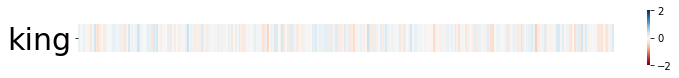

In [ ]:
plot_embeddings([model['king']], ['king'])

We can also compare multiple embeddings:

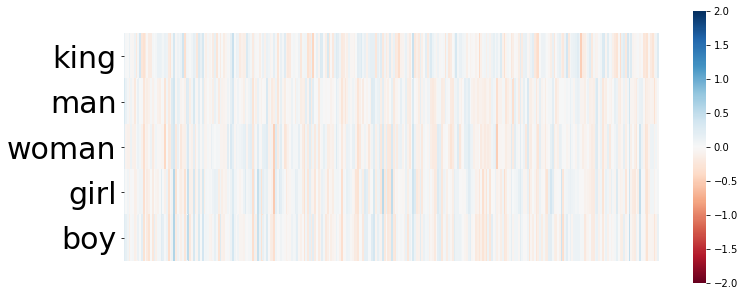

In [ ]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

##### How many words does this table have?

In [ ]:
model.vectors.shape

(3000000, 300)

Which means:
* 400,000 words (vocab_size)
* Each has an embedding composed of 50 numbers (embedding_size)

## Similarities b/w words

In [ ]:
model.most_similar('obama')

[('mccain', 0.7319012880325317),
 ('hillary', 0.7284600138664246),
 ('obamas', 0.7229631543159485),
 ('george_bush', 0.7205674648284912),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934449672698975),
 ('clintons', 0.6816834807395935),
 ('sarah_palin', 0.6815144419670105),
 ('john_mccain', 0.6800708770751953)]

In [ ]:
model.most_similar('banana')

[('bananas', 0.7523775696754456),
 ('pineapple', 0.6587538123130798),
 ('mango', 0.6365211606025696),
 ('pineapples', 0.6313878297805786),
 ('papaya', 0.6063666343688965),
 ('coconut', 0.6035483479499817),
 ('potato', 0.5747568607330322),
 ('melon', 0.5625776052474976),
 ('cashew', 0.562165379524231),
 ('tomato', 0.5590205788612366)]

## Analogies

king - man + woman  = ?

In [ ]:
model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7118


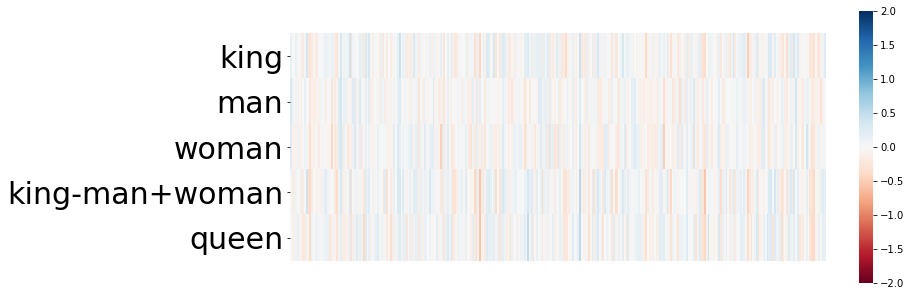

In [ ]:
# visulaizing
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'king-man+woman', 'queen'])

In [ ]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))

array([[0.73005176]], dtype=float32)

Let's compare that to the distance between the result and `king`:

In [ ]:
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.84493935]], dtype=float32)

So the result is more similar to king (0.8859834 similarity score) than it is to queen (0.8609581 similarity score).

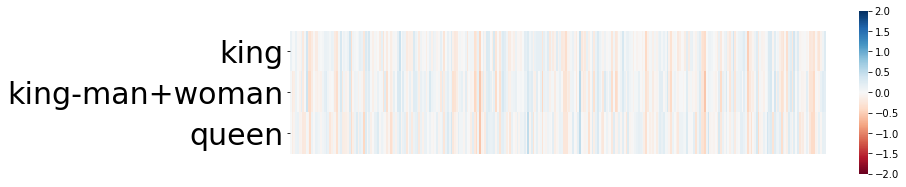

In [ ]:
plot_embeddings( [model['king'],
                 result, 
                 model['queen']],
                 ['king', 'king-man+woman', 'queen'])

doctor - man + woman = ?

In [ ]:
model.most_similar(positive=["doctor", "woman"], negative=["man"])

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
analogy('australia', 'beer', 'france')

'champagne'

In [ ]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'dreadful'

# **Transfer Learning**
say you want to use the above already trained models but also train on the data you are working with, so is that possible??? YES


In [ ]:
model = Word2Vec(size = 100, window = 10, min_count=100, sg = 1)
model.build_vocab(yourdata,update=True)
model.train(yourdata, total_examples=model.corpus_count, epochs=100)